In [ ]:
# pip install nilearn within 
import nilearn as nib

import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import nibabel as nib
import seaborn as sns
import numpy as np
import glob
import random 
import os
from tabulate import tabulate
from nilearn.connectome import ConnectivityMeasure
import networkx as nx


%matplotlib inline


from nilearn.plotting import plot_surf, plot_surf_contours

# nilearn import (later in the code)
import os
os.chdir("/scratch/a/arisvoin/iismail")

current_directory = os.getcwd()
print("Current working directory:", current_directory)

In [29]:
subject_ids = [861456,105014, 110411, 339847, 578158]

# Iterate over each subject ID
for subject_id in subject_ids:
    # Filter data for the current subject ID
    subject_data = data[data['Subject'] == subject_id]

    # Check if data for the current subject ID is found
    if not subject_data.empty:
        # Access gender and age columns using correct capitalization
        gender = subject_data['Gender'].iloc[0]  # Note the capital 'G'
        age = subject_data['Age'].iloc[0]        # Note the capital 'A'
        print(f"Subject {subject_id}: Gender: {gender}, Age: {age}")
    else:
        print(f"Data not found for subject {subject_id}")

Subject 861456: Gender: F, Age: 31-35
Subject 105014: Gender: F, Age: 26-30
Subject 110411: Gender: M, Age: 31-35
Subject 339847: Gender: F, Age: 26-30
Subject 578158: Gender: M, Age: 26-30


In [30]:
patients = ['861456', '105014', '110411', '339847', '578158']
files_per_patient = {}

for patient in patients:
    files = sorted(glob.glob(f"/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv", recursive=True))
    files_per_patient[patient] = files

for patient, files in files_per_patient.items():
    print(f"Files for patient {patient}:")
    for file in files:
        print(file)

Files for patient 861456:
/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv
Files for patient 105014:
/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv
Files for patient 110411:
/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv
Files for patient 339847:
/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv
Files for patient 578158:
/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv


In [31]:
subject_ids = [861456,105014, 110411, 339847, 578158]

# Iterate over each subject ID
for subject_id in subject_ids:
    # Filter data for the current subject ID
    subject_data = data[data['Subject'] == subject_id]

    # Check if data for the current subject ID is found
    if not subject_data.empty:
        # Access gender and age columns using correct capitalization
        gender = subject_data['Gender'].iloc[0]  # Note the capital 'G'
        age = subject_data['Age'].iloc[0]        # Note the capital 'A'
        print(f"Subject {subject_id}: Gender: {gender}, Age: {age}")
    else:
        print(f"Data not found for subject {subject_id}")

Subject 861456: Gender: F, Age: 31-35
Subject 105014: Gender: F, Age: 26-30
Subject 110411: Gender: M, Age: 31-35
Subject 339847: Gender: F, Age: 26-30
Subject 578158: Gender: M, Age: 26-30


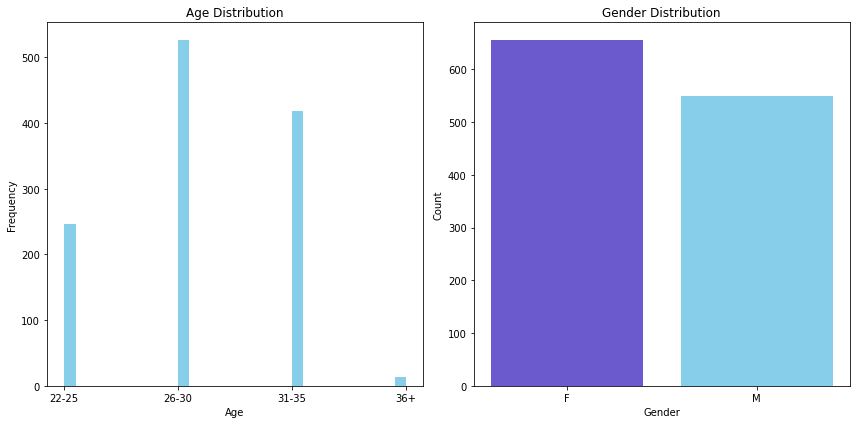

In [67]:
# Load patient data from CSV file (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv')

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Demographic graph for Age
axs[0].hist(data['Age'], color='skyblue', bins=30)
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Demographic graph for Gender
gender_counts = data['Gender'].value_counts()
axs[1].bar(gender_counts.index, gender_counts.values, color=['slateblue', 'skyblue'])
axs[1].set_title('Gender Distribution')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [34]:
# Load the CSV file
data = pd.read_csv('/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv')

# Get the dimensions (number of rows and columns)
num_rows, num_cols = data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 1206
Number of columns: 582


In [35]:
# Load the CSV file
data = pd.read_csv('/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv')

# Get the column names
column_names = data.columns

print("Column names:")
for column_name in column_names:
    print(column_name)

Column names:
Subject
Release
Acquisition
Gender
Age
3T_Full_MR_Compl
T1_Count
T2_Count
3T_RS-fMRI_Count
3T_RS-fMRI_PctCompl
3T_Full_Task_fMRI
3T_tMRI_PctCompl
fMRI_WM_PctCompl
fMRI_Gamb_PctCompl
fMRI_Mot_PctCompl
fMRI_Lang_PctCompl
fMRI_Soc_PctCompl
fMRI_Rel_PctCompl
fMRI_Emo_PctCompl
3T_dMRI_Compl
3T_dMRI_PctCompl
dMRI_3T_ReconVrs
fMRI_3T_ReconVrs
7T_Full_MR_Compl
7T_RS-fMRI_Count
7T_RS-fMRI_PctCompl
7T_Full_Task_fMRI
7T_tMRI_PctCompl
fMRI_Movie_Compl
fMRI_Movie_PctCompl
fMRI_Ret_Compl
fMRI_Ret_PctCompl
7T_dMRI_Compl
7T_dMRI_PctCompl
7T_fMRI_Mov_Vrs
MEG_AnyData
MEG_FullProt_Compl
MEG_HeadModel_Avail
MEG_CortRibn_Avail
MEG_Anatomy_Avail
MEG_Anatomy_Compl
MEG_Noise_Avail
MEG_Noise_Compl
MEG_RS_Avail
MEG_RS_Compl
MEG_WM_Avail
MEG_WM_Compl
MEG_StoryMath_Avail
MEG_StoryMath_Compl
MEG_Motor_Avail
MEG_Motor_Compl
Non-TB_Compl
VisProc_Compl
DelDisc_Compl
SCPT_Compl
IWRD_Compl
PMAT_Compl
VSPLOT_Compl
EmoRecog_Compl
NEO-FFI_Compl
ASR-Syn_Compl
ASR-DSM_Compl
Toolbox_Compl
MMSE_Compl
PSQI_Compl


In [38]:
# Load the CSV file
data = pd.read_csv('/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv')

# Convert 'Age' column to numeric values (handle errors with 'coerce' to convert non-numeric values to NaN)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Drop rows with NaN values in the 'Age' column
data = data.dropna(subset=['Age'])

# Calculate gender ratios
gender_counts = data['Gender'].value_counts()
total_count = gender_counts.sum()
gender_ratios = gender_counts / total_count

# Calculate age group ratios
age_group_counts = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_group_ratios = age_group_counts.value_counts() / len(data)

# Print the results
print("Gender Ratios:")
print(gender_ratios)
print("\nAge Group Ratios:")
print(age_group_ratios)

Gender Ratios:
Series([], Name: Gender, dtype: float64)

Age Group Ratios:
(90, 100]   NaN
(80, 90]    NaN
(70, 80]    NaN
(60, 70]    NaN
(50, 60]    NaN
(40, 50]    NaN
(30, 40]    NaN
(20, 30]    NaN
(0, 20]     NaN
Name: Age, dtype: float64


In [40]:
# Load the data from the CSV file
data = pd.read_csv('/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv')

# Selecting columns of interest for unadjusted cognitive scores
unadjusted_cognitive_columns = ['CogEarlyComp_Unadj', 'CogTotalComp_Unadj', 'CogCrystalComp_Unadj']

# Filter data for the selected unadjusted cognitive columns
unadjusted_cognitive_data = data[['Subject'] + unadjusted_cognitive_columns]

# Displaying the unadjusted cognitive data
print(unadjusted_cognitive_data)


      Subject  CogEarlyComp_Unadj  CogTotalComp_Unadj  CogCrystalComp_Unadj
0      100004              116.58              107.85                110.74
1      100206              133.56              137.66                117.33
2      100307              116.20              116.73                109.38
3      100408              132.46              137.53                134.34
4      100610              138.14              153.36                144.96
...       ...                 ...                 ...                   ...
1201   992774              113.23              109.50                107.68
1202   993675              127.65              139.38                134.24
1203   994273              112.32              122.98                133.94
1204   995174              109.27              112.19                110.89
1205   996782              116.19              128.04                136.36

[1206 rows x 4 columns]


In [41]:
# Load the data from the CSV file
data = pd.read_csv('/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv')

# Selecting columns of interest for unadjusted cognitive scores
unadjusted_cognitive_columns = ['CogEarlyComp_Unadj', 'CogTotalComp_Unadj', 'CogCrystalComp_Unadj']

# Filter data for the specific participants and unadjusted cognitive columns
specific_unadjusted_cognitive_data = data[data['Subject'].isin(['861456', '105014', '110411', '339847', '578158'])][['Subject'] + unadjusted_cognitive_columns]

# Displaying the unadjusted cognitive data for specific participants
print(specific_unadjusted_cognitive_data)

      Subject  CogEarlyComp_Unadj  CogTotalComp_Unadj  CogCrystalComp_Unadj
29     105014              110.64              117.16                123.81
56     110411              124.85              137.55                127.24
707    339847              121.92              121.14                117.80
891    578158              125.17              146.04                127.26
1108   861456              113.88              113.27                113.88


In [ ]:
# Load the data from the CSV file
data = pd.read_csv('/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv')

# Selecting columns of interest for unadjusted cognitive scores
unadjusted_cognitive_columns = ['CogEarlyComp_Unadj', 'CogTotalComp_Unadj', 'CogCrystalComp_Unadj']

# Filter data for the specific participants and unadjusted cognitive columns
specific_unadjusted_cognitive_data = data[data['Subject'].isin(['861456'])][['Subject'] + unadjusted_cognitive_columns]

# Calculate the mean for each cognitive score column
cognitive_scores_mean = specific_unadjusted_cognitive_data[unadjusted_cognitive_columns].mean()

# Add a row for the overall mean to the dataframe
overall_mean_row = pd.DataFrame({'Subject': 'Overall Mean', **cognitive_scores_mean}, index=[0])

# Concatenate the overall mean row with the specific unadjusted cognitive data
specific_unadjusted_cognitive_data = pd.concat([specific_unadjusted_cognitive_data, overall_mean_row])

# Displaying the unadjusted cognitive data for specific participants
print(tabulate(specific_unadjusted_cognitive_data, headers='keys', tablefmt='pretty', showindex=False))

In [102]:
# Load the data from the CSV file
data = pd.read_csv('/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv')

# Selecting columns of interest for unadjusted cognitive scores
unadjusted_cognitive_columns = ['CogEarlyComp_Unadj', 'CogTotalComp_Unadj', 'CogCrystalComp_Unadj']

# Filter data for the specific participants and unadjusted cognitive columns
specific_unadjusted_cognitive_data = data[data['Subject'].isin(['861456', '105014', '110411', '339847', '578158'])][['Subject'] + unadjusted_cognitive_columns]

# Calculate the mean for each column
mean_values = specific_unadjusted_cognitive_data.mean()

# Display the mean values
print("Mean Values:")
print(mean_values)

Mean Values:
Subject                 398977.200
CogEarlyComp_Unadj         119.292
CogTotalComp_Unadj         127.032
CogCrystalComp_Unadj       121.998
dtype: float64


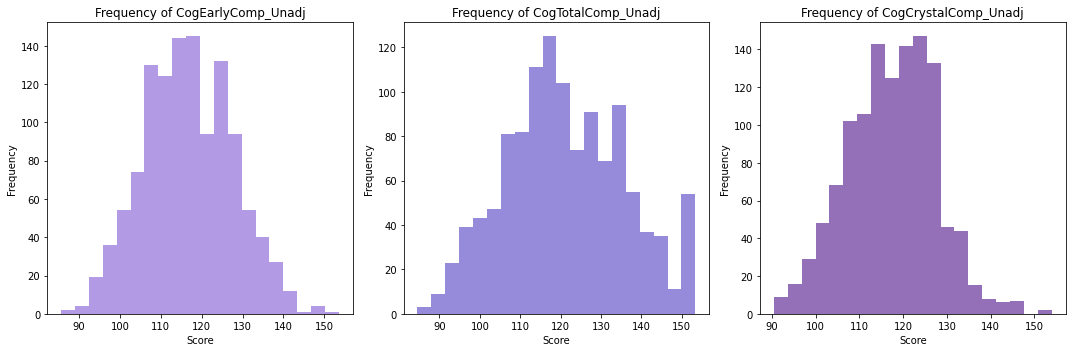

In [85]:
# Load the data from the CSV file
data = pd.read_csv('/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv')

# Selecting columns of interest for unadjusted cognitive scores
unadjusted_cognitive_columns = ['CogEarlyComp_Unadj', 'CogTotalComp_Unadj', 'CogCrystalComp_Unadj']

# Define colors for each variable
colors = ['mediumpurple','slateblue','rebeccapurple']

# Plotting the data
plt.figure(figsize=(15, 5))

for i, (column, color) in enumerate(zip(unadjusted_cognitive_columns, colors), 1):
    plt.subplot(1, 3, i)
    plt.hist(data[column], bins=20, alpha=0.7, color=color)
    plt.title(f'Frequency of {column}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
''''
# Step 1: Load and preprocess fMRI data
# Replace 'your_fmri_data.nii.gz' with the path to your fMRI data file
# Perform any necessary preprocessing steps, such as motion correction and parcellation
fmri_file = 'your_fmri_data.nii.gz'

# Step 2: Construct brain network
# Calculate functional connectivity matrices
connectivity_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = connectivity_measure.fit_transform([fmri_file])

# Convert correlation matrices to networkx graphs
graphs = [nx.from_numpy_array(matrix) for matrix in correlation_matrices]

# Step 3: Apply community detection algorithm
# Identify modules using Louvain method
partition = community.best_partition(graphs[0])  # Using the first graph for demonstration

# Step 4: Visualize brain network and its modular structure
# Plot brain network
plotting.plot_connectome(np.zeros((68, 68)), 'your_parcellation.nii.gz', node_color='black',
                          edge_threshold='98%', title='Brain Network')

# Visualize modular structure
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(graphs[0])  # Layout for visualization
colors = [partition[node] for node in graphs[0].nodes()]
nx.draw(graphs[0], pos, node_color=colors, cmap=plt.cm.get_cmap('tab10'), with_labels=False)
plt.title('Modular Structure of Brain Network')
plt.show()